In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
#import statsmodels.stats.multitest as smm
from statsmodels.stats.weightstats import *
#from statsmodels.sandbox.stats.multicomp import multipletests 
from statsmodels.stats.proportion import proportion_confint

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
credit = pd.read_csv('credit_card_default_analysis.csv', sep = ",", header = 0)
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
credit_returned_true = credit[credit['default'] == 0].drop(['default'], axis = 1)
credit_returned_false = credit[credit['default'] == 1].drop(['default'], axis = 1)

## Task 1

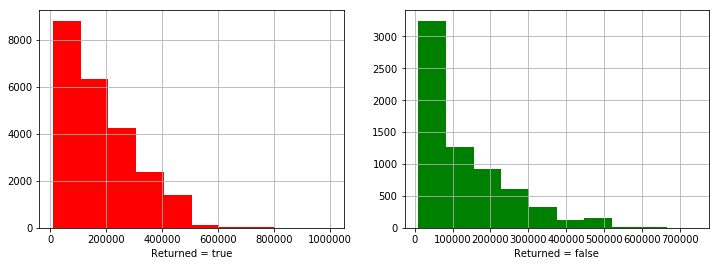

In [5]:
pylab.figure(figsize=(12,4))

pylab.subplot(1,2,1)
pylab.grid()
pylab.hist(credit['LIMIT_BAL'][credit['default'] == 0], color = 'r')
pylab.xlabel('Returned = true')

pylab.subplot(1,2,2)
pylab.grid()
pylab.hist(credit['LIMIT_BAL'][credit['default'] == 1], color = 'g')
pylab.xlabel('Returned = false')

pylab.show()

In [6]:
# -- A -- 
print '95%% confidence interval for the mean (Returned): [%f, %f]' % zconfint(credit_returned_true['LIMIT_BAL'])
print '95%% confidence interval for the mean (Not Returned): [%f, %f]' % zconfint(credit_returned_false['LIMIT_BAL'])

# -- B -- 
stats.mannwhitneyu(credit_returned_true['LIMIT_BAL'], credit_returned_false['LIMIT_BAL'])

95% confidence interval for the mean (Returned): [176411.914497, 179787.537651]
95% confidence interval for the mean (Not Returned): [127333.653340, 132885.659499]


MannwhitneyuResult(statistic=59257217.5, pvalue=6.127742909111652e-190)

**Вывод**: среднее значение размера кредитного лимита выше у тех, кто в итоге вернул кредит. И критерий Манна-Уитни опровергает гипотезу о том что средние одинаковые. Результаты знечимы с практической точки зрения.

## Task 2

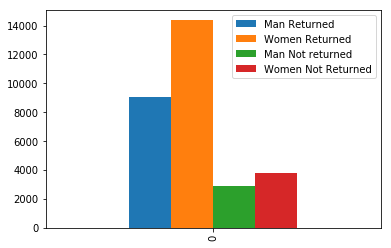

In [7]:
returned = credit['SEX'][credit['default'] == 0] - 1
not_returned = credit['SEX'][credit['default'] == 1] - 1

gender_stat = pd.DataFrame([[len(returned) - sum(returned),
                          sum(returned),
                          len(not_returned) - sum(not_returned),
                          sum(not_returned)]], 
                      columns = ["Man Returned", "Women Returned", "Man Not returned", "Women Not Returned"])

pylab.figure(figsize=(12,4))
gender_stat.plot.bar()
pylab.show()

In [8]:
# -- Confidence interval ---
conf_interval_returned_true = proportion_confint(sum(credit_returned_true['SEX']-1), 
                                            len(credit_returned_true['SEX']),
                                            method = 'wilson')
conf_interval_returned_false = proportion_confint(sum(credit_returned_false['SEX']-1), 
                                            len(credit_returned_false['SEX']),
                                            method = 'wilson')
print '95%% confidence interval for the mean (Returned): [%f, %f]' % conf_interval_returned_true
print '95%% confidence interval for the mean (Not Returned): [%f, %f]' % conf_interval_returned_false

# -- Stat Criteria ---

def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

print "p-value: %f" % proportions_diff_z_test(proportions_diff_z_stat_ind(credit_returned_true['SEX']-1, 
                                                                              credit_returned_false['SEX']-1))

95% confidence interval for the mean (Returned): [0.607890, 0.620373]
95% confidence interval for the mean (Not Returned): [0.555102, 0.578938]
p-value: 0.000000


**Вывод:** из того что доверительные интервалы не пересекаются и того, что p-value очень низкий, делаем вывод что гендерный состав отличается (женщины более исправно выплачивают кредит).

## Task 3

In [9]:
# -- Посроим таблицу сопряженности
contingency_table = pd.crosstab(credit['EDUCATION'], credit['default'])
contingency_table

default,0,1
EDUCATION,,
0,14,0
1,8549,2036
2,10700,3330
3,3680,1237
4,116,7
5,262,18
6,43,8


In [10]:
# Визуализируем процент невозвращенных кредитов в зависимости от образования
perc = []
credit_mean = float(sum(credit['default']))/len(credit['default'])
for i in range(0,7):
    perc.append(float(sum(credit[credit['EDUCATION'] ==  i]['default']))/ \
                len(credit[credit['EDUCATION'] ==  i]['default']))
noreturns_percent = pd.DataFrame([perc],columns=['доктор','магистр','бакалавр','выпускник школы','начальное образование','прочее','нет данных'])
noreturns_percent

,доктор,магистр,бакалавр,выпускник школы,начальное образование,прочее,нет данных
0,0.0,0.192348,0.237349,0.251576,0.056911,0.064286,0.156863


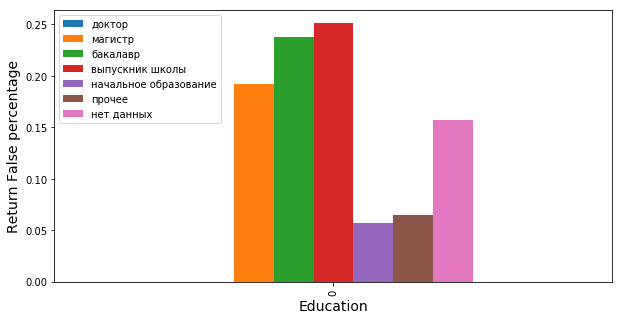

In [11]:
plt.figure(figsize(10,5))
noreturns_percent.plot.bar()
plt.xlabel('Education', fontsize=14)
plt.ylabel('Return False percentage', fontsize=14)
pylab.show()

In [12]:
# Посчитаем коэф-т Крамера и p-value
def v_cramer(contingency_table):
    chi2, p, dof, ex = scipy.stats.chi2_contingency(contingency_table)
    n = sum(sum(contingency_table))
    return np.sqrt(chi2 / (n*(min(shape(contingency_table))-1))), p

FC, pvalue = v_cramer(contingency_table)
print 'Коэф-т Крамера: %f; p-value: %f' % v_cramer(contingency_table)


Коэф-т Крамера: 0.073760; p-value: 0.000000


**Выводы:** 

Вопрос: Как бы вы предложили модифицировать таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в интерпретируемости?<br>
Ответ: как показано в датафрейме noreturns_percent - по каждой категории отобразить процент невозврата кредита<br><br>
Вопрос: Наличие какого образования является наилучшим индикатором того, что человек отдаст долг?<br>
Ответ: Доктор<br><br>
Вопрос: наоборт, не отдаст долг?<br>
Ответ: Выпускник школы<br>

## Task 4

In [13]:
contingency_table_marriage = pd.crosstab(credit['MARRIAGE'], credit['default'])
contingency_table_marriage

default,0,1
MARRIAGE,,
0,49,5
1,10453,3206
2,12623,3341
3,239,84


In [14]:
perc = []
credit_mean = float(sum(credit['default']))/len(credit['default'])
for i in range(0,4):
    perc.append(float(sum(credit[credit['MARRIAGE'] ==  i]['default']))/ \
                len(credit[credit['MARRIAGE'] ==  i]['default']))

#len(perc)
noreturns_percent = pd.DataFrame([perc],columns=['отказываюсь отвечать','замужем/женат','холост','нет данных'])
noreturns_percent

,отказываюсь отвечать,замужем/женат,холост,нет данных
0,0.092593,0.234717,0.209283,0.260062


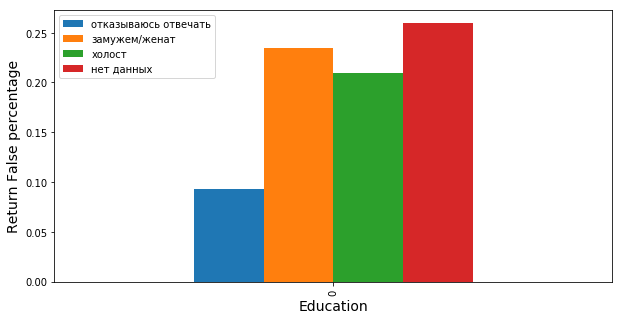

In [15]:
plt.figure(figsize(10,5))
noreturns_percent.plot.bar()
plt.xlabel('Education', fontsize=14)
plt.ylabel('Return False percentage', fontsize=14)
pylab.show()

In [16]:
proportions_diff_confint_ind(credit[credit['MARRIAGE'] ==  1]['default'], credit[credit['MARRIAGE'] ==  2]['default'])

(0.01592898928094534, 0.034938308247285874)

In [17]:
proportions_diff_z_test(proportions_diff_z_stat_ind(credit[credit['MARRIAGE'] ==  1]['default'], 
                                                    credit[credit['MARRIAGE'] ==  2]['default']))

1.448514344026819e-07

In [18]:
FC, pvalue = v_cramer(contingency_table_marriage)
print 'Коэф-т Крамера: %f; p-value: %f' % v_cramer(contingency_table_marriage)

Коэф-т Крамера: 0.034478; p-value: 0.000000


**Ответ:** процент вылачиваемых кредитов у женатых и холостых значимо отличается. Женатые люди хуже выплачивают кредиты

## Task 5

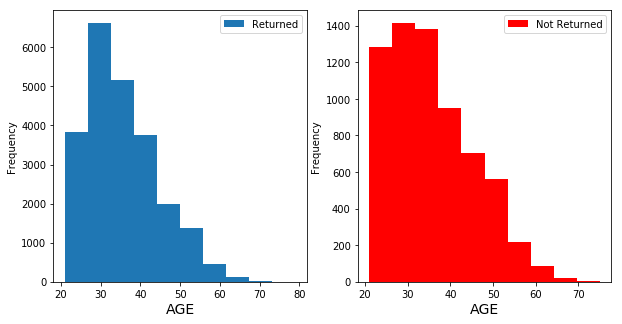

In [19]:
plt.figure(figsize(10,5))

plt.subplot(121)
credit[credit['default'] ==  0]['AGE'].plot.hist(label = "Returned")
plt.xlabel('AGE', fontsize=14)
pylab.legend()

plt.subplot(122)
credit[credit['default'] ==  1]['AGE'].plot.hist(label = "Not Returned", color = 'r')
plt.xlabel('AGE', fontsize=14)
pylab.legend()

pylab.show()

In [20]:
returned = credit[credit['default'] ==  0]['AGE']
not_returned = credit[credit['default'] ==  1]['AGE']

In [21]:
print '95%% confidence interval for the AGE mean (Returned): [%f, %f]' % zconfint(returned)
print '95%% confidence interval for the AGE mean (Not Returned): [%f, %f]' % zconfint(not_returned)

95% confidence interval for the AGE mean (Returned): [35.300871, 35.533661]
95% confidence interval for the AGE mean (Not Returned): [35.492515, 35.958962]


In [22]:
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)

def get_random_combinations(n1, n2, max_combinations):
    index = range(n1 + n2)
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

def permutation_zero_dist_ind(sample1, sample2, max_combinations = None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample, mean)
    
    zero_distr = permutation_zero_dist_ind(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

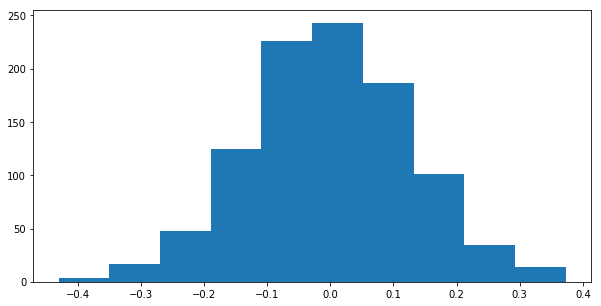

In [23]:
pylab.hist(permutation_zero_dist_ind(returned, not_returned, max_combinations = 1000))
pylab.show()

In [24]:
print "p-value: %f" % permutation_test(returned, not_returned, max_permutations = 1000)

p-value: 0.018000


Выводы: <br>
a) о равенстве медианных значений возрастов людей <br>
Ответ: Доверительные интервалы медиан пересекаются, то есть нельзя утверждать что они отличаются<br><br>
b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения?<br>
Ответ: Согласно перестановочному критерию гипотеза о равенстве средних отбрасывается в пользу альтернативы

